# Lab12: Alcohol Dataset – Naïve Bayes – KNN

### Author: Dianna Hummel

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


##### Step A

In [2]:
cols = ['id','sex','age','home','famsize','parstat','travtime',
'studytime', 'schsup','famsup','activities','nursery',
'highered','internet','romantic','famrel','freetime',
'goout','health','absences','alcuse']
alc_data = pd.read_csv("student-alc.csv", names = cols, index_col = 'id')
alc_data.head(10).T

id,1,2,3,4,5,6,7,8,9,10
sex,F,F,F,F,F,M,M,F,M,M
age,18,17,15,15,16,16,16,17,15,15
home,U,U,U,U,U,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3
parstat,A,T,T,T,T,T,T,A,A,T
travtime,2,1,1,1,1,1,1,2,1,1
studytime,2,2,2,3,2,2,2,2,2,2
schsup,yes,no,yes,no,no,no,no,yes,no,no
famsup,no,yes,no,yes,yes,yes,no,yes,yes,yes
activities,no,no,no,yes,no,yes,no,no,no,yes


In [3]:
alc_data.dtypes

sex           object
age            int64
home          object
famsize       object
parstat       object
travtime       int64
studytime      int64
schsup        object
famsup        object
activities    object
nursery       object
highered      object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
health         int64
absences       int64
alcuse        object
dtype: object

In [4]:
alc_data.shape

(395, 20)

##### Step B

In [5]:
alc_data.dropna(axis = 0, how = 'any')
alc_data.isnull().sum()

sex           0
age           0
home          0
famsize       0
parstat       0
travtime      0
studytime     0
schsup        0
famsup        0
activities    0
nursery       0
highered      0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
alcuse        0
dtype: int64

In [6]:
cols = ['sex','home','famsize','parstat','schsup','famsup',
 'activities', 'nursery','highered','internet',
 'romantic','alcuse']
for col in cols:
    alc_data[col] = alc_data[col].str.strip()

##### Step C

In [7]:
alc_data ['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

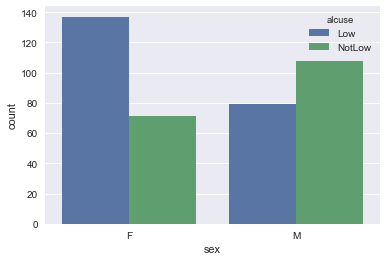

In [8]:
sns.countplot (x = 'sex', hue='alcuse', data = alc_data)

In [9]:
pd.pivot_table (alc_data, values='age', index=['sex'],
 columns='alcuse', margins = True, margins_name = 'total',
 aggfunc=lambda x: (len(x) / alc_data.shape[0])*100)

alcuse,Low,NotLow,total
sex,,,
F,34.683544,17.974684,52.658228
M,20.000000,27.341772,47.341772
total,54.683544,45.316456,100.000000


In [10]:
alc_data ['age'].value_counts()


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

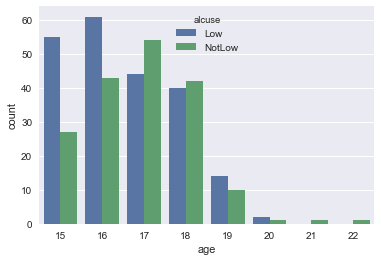

In [11]:
sns.countplot (x = 'age', hue='alcuse', data = alc_data)

In [12]:
pd.pivot_table (alc_data, values='sex', index=['age'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
age,,,
15,13.924051,6.835443,20.759494
16,15.443038,10.886076,26.329114
17,11.139241,13.670886,24.810127
18,10.126582,10.632911,20.759494
19,3.544304,2.531646,6.075949
20,0.506329,0.253165,0.759494
21,NaN,0.253165,0.253165
22,NaN,0.253165,0.253165
total,54.683544,45.316456,100.000000


In [13]:
alc_data ['home'].value_counts()

U    307
R     88
Name: home, dtype: int64

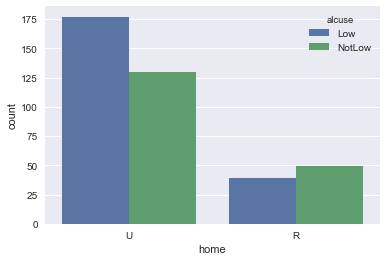

In [14]:
sns.countplot (x = 'home', hue='alcuse', data = alc_data)

In [15]:
pd.pivot_table (alc_data, values='sex', index=['home'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
home,,,
R,9.873418,12.405063,22.278481
U,44.810127,32.911392,77.721519
total,54.683544,45.316456,100.000000


In [16]:
alc_data ['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

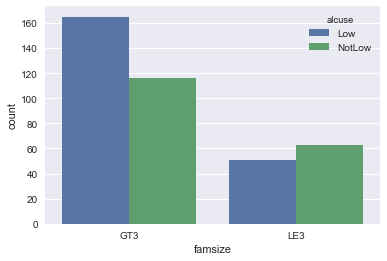

In [17]:
sns.countplot (x = 'famsize', hue='alcuse', data = alc_data)

In [18]:
pd.pivot_table (alc_data, values='sex', index=['famsize'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
famsize,,,
GT3,41.772152,29.367089,71.139241
LE3,12.911392,15.949367,28.860759
total,54.683544,45.316456,100.000000


In [19]:
alc_data ['parstat'].value_counts()

T    354
A     41
Name: parstat, dtype: int64

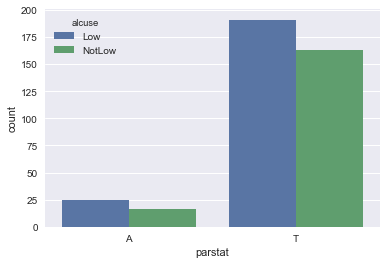

In [20]:
sns.countplot (x = 'parstat', hue='alcuse', data = alc_data)

In [21]:
pd.pivot_table (alc_data, values='sex', index=['parstat'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
parstat,,,
A,6.329114,4.050633,10.379747
T,48.354430,41.265823,89.620253
total,54.683544,45.316456,100.000000


In [22]:
alc_data ['travtime'].value_counts()

1    257
2    107
3     23
4      8
Name: travtime, dtype: int64

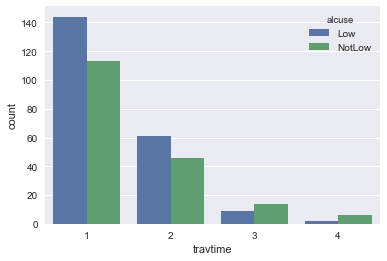

In [23]:
sns.countplot (x = 'travtime', hue='alcuse', data = alc_data)

In [24]:
pd.pivot_table (alc_data, values='sex', index=['travtime'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
travtime,,,
1,36.455696,28.607595,65.063291
2,15.443038,11.645570,27.088608
3,2.278481,3.544304,5.822785
4,0.506329,1.518987,2.025316
total,54.683544,45.316456,100.000000


In [25]:
alc_data ['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

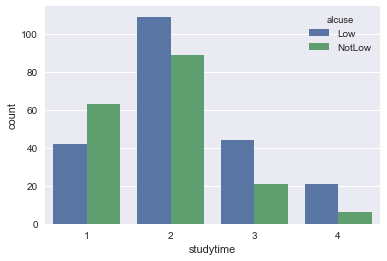

In [26]:
sns.countplot (x = 'studytime', hue='alcuse', data = alc_data)

In [27]:
pd.pivot_table (alc_data, values='sex', index=['studytime'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
studytime,,,
1,10.632911,15.949367,26.582278
2,27.594937,22.531646,50.126582
3,11.139241,5.316456,16.455696
4,5.316456,1.518987,6.835443
total,54.683544,45.316456,100.000000


In [28]:
alc_data ['schsup'].value_counts()

no     344
yes     51
Name: schsup, dtype: int64

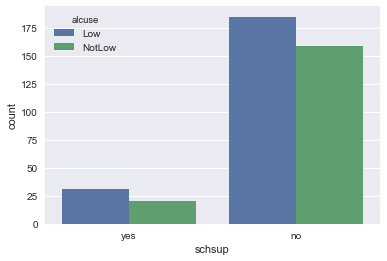

In [29]:
sns.countplot (x = 'schsup', hue='alcuse', data = alc_data)

In [30]:
pd.pivot_table (alc_data, values='sex', index=['schsup'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
schsup,,,
no,46.835443,40.253165,87.088608
yes,7.848101,5.063291,12.911392
total,54.683544,45.316456,100.000000


In [31]:
alc_data ['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

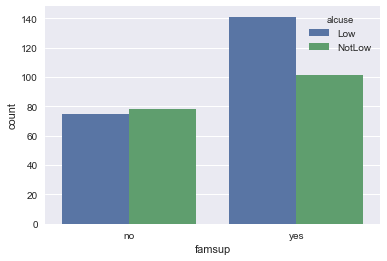

In [32]:
sns.countplot (x = 'famsup', hue='alcuse', data = alc_data)

In [33]:
pd.pivot_table (alc_data, values='sex', index=['famsup'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
famsup,,,
no,18.987342,19.746835,38.734177
yes,35.696203,25.569620,61.265823
total,54.683544,45.316456,100.000000


In [34]:
alc_data ['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

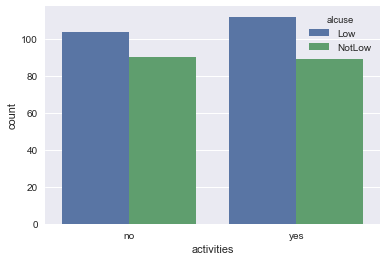

In [35]:
sns.countplot (x = 'activities', hue='alcuse', data = alc_data)

In [36]:
pd.pivot_table (alc_data, values='sex', index=['activities'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
activities,,,
no,26.329114,22.784810,49.113924
yes,28.354430,22.531646,50.886076
total,54.683544,45.316456,100.000000


In [37]:
alc_data ['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

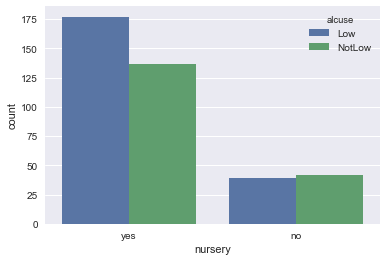

In [38]:
sns.countplot (x = 'nursery', hue='alcuse', data = alc_data)

In [39]:
pd.pivot_table (alc_data, values='sex', index=['nursery'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
nursery,,,
no,9.873418,10.632911,20.506329
yes,44.810127,34.683544,79.493671
total,54.683544,45.316456,100.000000


In [40]:
alc_data ['highered'].value_counts()

yes    375
no      20
Name: highered, dtype: int64

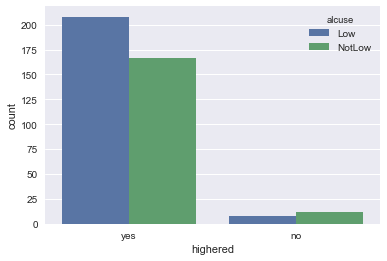

In [41]:
sns.countplot (x = 'highered', hue='alcuse', data = alc_data)

In [42]:
pd.pivot_table (alc_data, values='sex', index=['highered'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
highered,,,
no,2.025316,3.037975,5.063291
yes,52.658228,42.278481,94.936709
total,54.683544,45.316456,100.000000


In [43]:
alc_data ['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

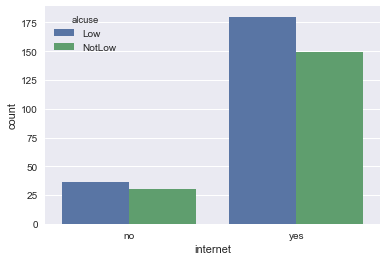

In [44]:
sns.countplot (x = 'internet', hue='alcuse', data = alc_data)

In [45]:
pd.pivot_table (alc_data, values='sex', index=['internet'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
internet,,,
no,9.113924,7.594937,16.708861
yes,45.569620,37.721519,83.291139
total,54.683544,45.316456,100.000000


In [46]:
alc_data ['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

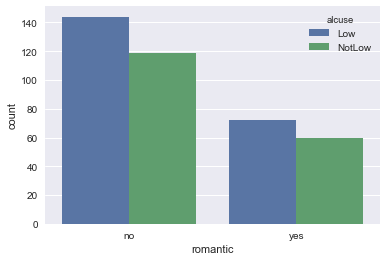

In [47]:
sns.countplot (x = 'romantic', hue='alcuse', data = alc_data)

In [48]:
pd.pivot_table (alc_data, values='sex', index=['romantic'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
romantic,,,
no,36.455696,30.126582,66.582278
yes,18.227848,15.189873,33.417722
total,54.683544,45.316456,100.000000


In [49]:
alc_data['famrel'].value_counts()

4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64

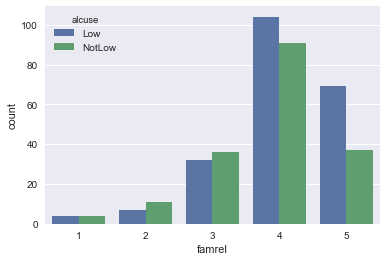

In [50]:
sns.countplot (x = 'famrel', hue='alcuse', data = alc_data)

In [51]:
pd.pivot_table (alc_data, values='sex', index=['famrel'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
famrel,,,
1,1.012658,1.012658,2.025316
2,1.772152,2.784810,4.556962
3,8.101266,9.113924,17.215190
4,26.329114,23.037975,49.367089
5,17.468354,9.367089,26.835443
total,54.683544,45.316456,100.000000


In [52]:
alc_data['freetime'].value_counts()

3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64

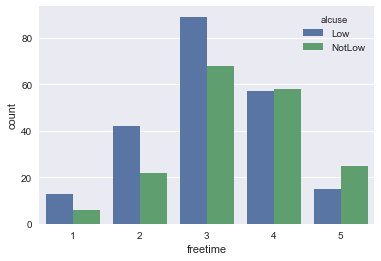

In [53]:
sns.countplot (x = 'freetime', hue='alcuse', data = alc_data)

In [54]:
pd.pivot_table (alc_data, values='sex', index=['freetime'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
freetime,,,
1,3.291139,1.518987,4.810127
2,10.632911,5.569620,16.202532
3,22.531646,17.215190,39.746835
4,14.430380,14.683544,29.113924
5,3.797468,6.329114,10.126582
total,54.683544,45.316456,100.000000


In [55]:
alc_data['goout'].value_counts()

3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64

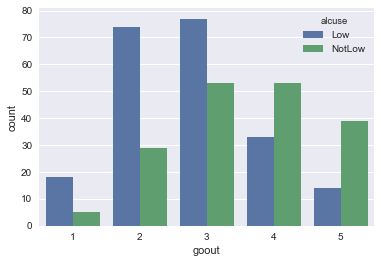

In [56]:
sns.countplot (x = 'goout', hue='alcuse', data = alc_data)

In [57]:
pd.pivot_table (alc_data, values='sex', index=['goout'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
goout,,,
1,4.556962,1.265823,5.822785
2,18.734177,7.341772,26.075949
3,19.493671,13.417722,32.911392
4,8.354430,13.417722,21.772152
5,3.544304,9.873418,13.417722
total,54.683544,45.316456,100.000000


In [58]:
alc_data['health'].value_counts()

5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64

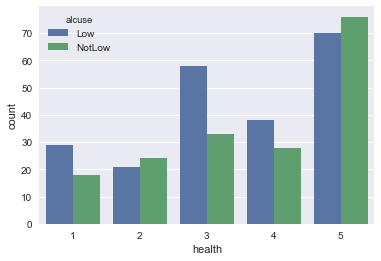

In [59]:
sns.countplot (x = 'health', hue='alcuse', data = alc_data)

In [60]:
pd.pivot_table (alc_data, values='sex', index=['health'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
health,,,
1,7.341772,4.556962,11.898734
2,5.316456,6.075949,11.392405
3,14.683544,8.354430,23.037975
4,9.620253,7.088608,16.708861
5,17.721519,19.240506,36.962025
total,54.683544,45.316456,100.000000


In [61]:
alc_data['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
7       7
16      7
18      5
5       5
20      4
22      3
13      3
1       3
9       3
11      3
15      3
23      1
24      1
21      1
25      1
56      1
26      1
28      1
30      1
17      1
38      1
40      1
54      1
19      1
75      1
Name: absences, dtype: int64

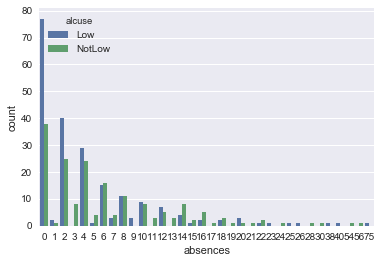

In [62]:
sns.countplot (x = 'absences', hue='alcuse', data = alc_data)

In [63]:
pd.pivot_table (alc_data, values='sex', index=['absences'],
 columns='alcuse', margins = True,
 margins_name = 'total',
 aggfunc=lambda x: (len(x) /
 alc_data.shape[0])*100)

alcuse,Low,NotLow,total
absences,,,
0,19.493671,9.620253,29.113924
1,0.506329,0.253165,0.759494
2,10.126582,6.329114,16.455696
3,NaN,2.025316,2.025316
4,7.341772,6.075949,13.417722
5,0.253165,1.012658,1.265823
6,3.797468,4.050633,7.848101
7,0.759494,1.012658,1.772152
8,2.784810,2.784810,5.569620


In [64]:
alc_data ['alcuse'].value_counts()

Low       216
NotLow    179
Name: alcuse, dtype: int64

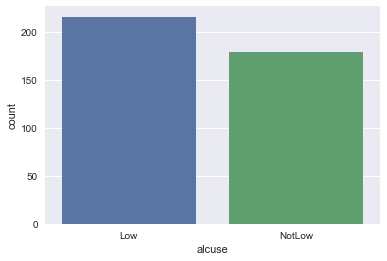

In [65]:
sns.countplot (x = 'alcuse', data = alc_data)


##### Step D

In [66]:
cols = ['schsup', 'famsup', 'activities', 'nursery',
 'highered','internet','romantic']
for col in cols:
    values_str = alc_data[col].values
    values_int = [0 if v == 'no' else 1 for v in values_str]
    alc_data[col] = values_int
    alc_data[col].value_counts()

In [67]:
values = alc_data['alcuse'].values
alcuse = [0 if v == 'Low' else 1 for v in values]
alc_data['alcuse'] = alcuse
alc_data['alcuse'].value_counts()

0    216
1    179
Name: alcuse, dtype: int64

In [68]:
values = alc_data['sex'].values
sex = [0 if v == 'M' else 1 for v in values]
alc_data['sex'] = sex
alc_data['sex'].value_counts()

1    208
0    187
Name: sex, dtype: int64

In [69]:
values = alc_data['home'].values
home = [0 if v == 'R' else 1 for v in values]
alc_data['home'] = home
alc_data['home'].value_counts()

1    307
0     88
Name: home, dtype: int64

In [70]:
values = alc_data['famsize'].values
famsize = [0 if v == 'LE3' else 1 for v in values]
alc_data['famsize'] = famsize
alc_data['famsize'].value_counts()

1    281
0    114
Name: famsize, dtype: int64

In [72]:
values = alc_data['parstat'].values
parstat = [0 if v == 'A' else 1 for v in values]
alc_data['parstat'] = parstat
alc_data['parstat'].value_counts()

1    354
0     41
Name: parstat, dtype: int64

In [73]:
alc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,395.0,0.526582,0.499926,0.0,0.0,1.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
home,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.711392,0.453690,0.0,0.0,1.0,1.0,1.0
parstat,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
travtime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
schsup,395.0,0.129114,0.335751,0.0,0.0,0.0,0.0,1.0
famsup,395.0,0.612658,0.487761,0.0,0.0,1.0,1.0,1.0
activities,395.0,0.508861,0.500555,0.0,0.0,1.0,1.0,1.0


##### Step E

In [75]:
Y = alc_data ['alcuse']
X = alc_data.drop (['alcuse'], axis=1)
scores_list = []
for k in range (5, 20):
    kbest = SelectKBest(chi2, k=k)
    X_best = kbest.fit_transform(X, Y)
    gnb = GaussianNB()
    gnb.fit(X_best, Y)
    score = gnb.score(X_best, Y)
    scores_list.append(score)
max_score = max(scores_list)
print ("Best Score: ", max_score)
for i in range(len (scores_list)):
    if max_score == scores_list[i]:
        print("Best K: ", i+5)

Best Score:  0.718987341772
Best K:  11


In [77]:
kbest = SelectKBest(chi2, k=11)
kbest.fit(X,Y)
X_best = kbest.transform(X)
Xv = X.values
col_list = []
for j in range (len (X_best.T)):
    for c in range (len (Xv.T)):
        found = True
        for x in range(100):
            if Xv[x][c] != X_best[x][j]:
                found = False
        if found:
            col_list.append(c)
col_list

[0, 2, 3, 5, 6, 8, 14, 15, 16, 17, 18]

In [79]:
del_list = [1,4,7,9,10,11,12,13]
del_cols = ['age','parstat','schsup','activities','nursery',
 'highered','internet','romantic']
X_best = X.drop(del_cols, axis = 1)
X_best.shape

(395, 11)

In [106]:
# mary said 10 extra points!!!!
best_feat = [alc_data.columns[index] for index in col_list]
print("Can I get extra credit for this since I used a list comprehension...\nto find the best features based on their indices???? :) ")
best_feat

Can I get extra credit for this since I used a list comprehension...
to find the best features based on their indices???? :) 


['sex',
 'home',
 'famsize',
 'travtime',
 'studytime',
 'famsup',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences']

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            386, 387, 388, 389, 390, 391, 392, 393, 394, 395],
           dtype='int64', name='id', length=395)

In [87]:
gnb = GaussianNB()
gnb.fit(X_best, Y)
score = gnb.score(X_best, Y)
print ("Full Set Accuracy: ", score)

Full Set Accuracy:  0.718987341772


In [88]:
gnb = GaussianNB()
gnb.fit(X_best, Y)
scores = cross_val_score(gnb, X_best, Y, cv=6)
print ('Mean CV Accuracy: ', scores.mean())

Mean CV Accuracy:  0.67634032634


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_best, Y,
 random_state=69,test_size=0.33)
gnb = GaussianNB()
gnb.fit (X_train, Y_train)
score = gnb.score (X_test, Y_test)
print ("Test Set Accuracy: ", score)

Test Set Accuracy:  0.732824427481


[[56 12]
 [23 40]]


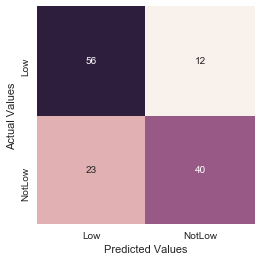

In [90]:
Y_pred = gnb.predict(X_test)
mat = confusion_matrix (Y_test, Y_pred)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
 fmt="d", xticklabels = ['Low','NotLow'],
 yticklabels= ['Low','NotLow'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

True Positives = 40
True Negatives = 56
False Positives = 12
False Negatives = 23
Sensitivity: True Positive Rate = .6349
Specificity: True Negative Rate = .8235
Accuracy = .7328

##### Step F

In [105]:
Y = alc_data ['alcuse']
X = alc_data.drop (['alcuse'], axis=1)
sc = MinMaxScaler()
sc.fit(X)
X_norm = sc.transform(X)
scores_list = []
for k in range (5, 20):
    kbest = SelectKBest(chi2, k=k)
    X_best = kbest.fit_transform(X_norm, Y)
    gnb = GaussianNB()
    gnb.fit(X_best, Y)
    score = gnb.score(X_best, Y)
    scores_list.append(score)
max_score = max(scores_list)
print("Best Score: ", max_score)
for i in range(len (scores_list)):
    if max_score == scores_list[i]:
        print("Best K: ",i+5)

Best Score:  0.718987341772
Best K:  10


In [107]:
del_list = [4,7,9,10,11,12,13,14,17]
del_cols = ['parstat','schsup','activities','nursery',
 'highered','internet','romantic','famrel','health']
X_best = np.delete(X_norm, del_list, axis=1)
X_best.shape

(395, 10)

In [113]:
col_list = [0, 1, 2, 3, 5, 6, 8, 15, 16, 18]
# mary said 10 extra points!!!!
best_feat = [alc_data.columns[index] for index in col_list]
print("Can I get extra credit for this since I used a list comprehension...\nto find the best features based on their indices???? :) ")
best_feat

Can I get extra credit for this since I used a list comprehension...
to find the best features based on their indices???? :) 


['sex',
 'age',
 'home',
 'famsize',
 'travtime',
 'studytime',
 'famsup',
 'freetime',
 'goout',
 'absences']

In [114]:
gnb = GaussianNB()
gnb.fit(X_best, Y)
score = gnb.score(X_best, Y)
print ("Full Set Accuracy: ", score)

Full Set Accuracy:  0.718987341772


In [115]:
gnb = GaussianNB()
gnb.fit(X_best, Y)
scores = cross_val_score(gnb, X_best, Y, cv=6)
print ('Mean CV Accuracy: ', scores.mean())

Mean CV Accuracy:  0.661033411033


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X_best, Y,
 random_state=69,test_size=0.33)
gnb = GaussianNB()
gnb.fit (X_train, Y_train)
score = gnb.score (X_test, Y_test)
print ("Test Set Accuracy: ", score)

Test Set Accuracy:  0.732824427481


[[56 12]
 [23 40]]


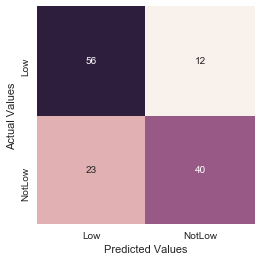

In [117]:
Y_pred = gnb.predict(X_test)
mat = confusion_matrix (Y_test, Y_pred)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
 fmt="d", xticklabels = ['Low','NotLow'],
 yticklabels= ['Low','NotLow'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

##### Step G

In [119]:
Y = alc_data ['alcuse']
X = alc_data.drop (['alcuse'], axis=1)
scores_list = []
k_list = []
for k in range(3,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=3)
    scores_list.append(scores.mean())
    k_list.append(k)
max_score = max(scores_list)
print ('Best Mean Score', max_score)
for i in range(len (k_list)):
    if max_score == scores_list[i]:
        print ("Best K: ", k_list[i])

Best Mean Score 0.622812090369
Best K:  7


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15,test_size=0.33)
knn = KNeighborsClassifier (n_neighbors=7)
knn.fit (X_train,Y_train)
score = knn.score (X_test, Y_test)
print('Test Set Accuracy: {:.4f}'.format(score))

Test Set Accuracy: 0.6794


[[56 18]
 [24 33]]


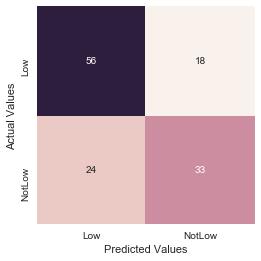

In [124]:
Y_pred = knn.predict(X_test)
mat = confusion_matrix (Y_test, Y_pred)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
 fmt="d", xticklabels = ['Low','NotLow'],
 yticklabels= ['Low','NotLow'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

True Positives = 33
True Negatives =56
False Positives =18
False Negatives =24
Sensitivity: True Positive Rate =.3708
Specificity: True Negative Rate =.5714
Accuracy =.4351

##### Step H

In [130]:
Y = alc_data ['alcuse']
X = alc_data.drop (['alcuse'], axis=1)
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X = X_std

In [131]:
scores_list = []
k_list = []
for k in range(3,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=3)
    scores_list.append(scores.mean())
    k_list.append(k)
max_score = max(scores_list)
print ('Best Mean Score', max_score)
for i in range(len (k_list)):
    if max_score == scores_list[i]:
        print ("Best K: ", k_list[i])

Best Mean Score 0.648045338885
Best K:  19


In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=69,test_size=0.33)
knn = KNeighborsClassifier (n_neighbors=19)
knn.fit (X_train,Y_train)
score = knn.score (X_test, Y_test)
print('Test Set Accuracy: {:.4f}'.format(score))

Test Set Accuracy: 0.7023


[[57 11]
 [28 35]]


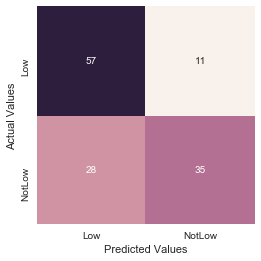

In [135]:
Y_pred = knn.predict(X_test)
mat = confusion_matrix (Y_test, Y_pred)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
 fmt="d", xticklabels = ['Low','NotLow'],
 yticklabels= ['Low','NotLow'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

True Positives = 35
True Negatives = 57
False Positives = 11
False Negatives = 28
Sensitivity: True Positive Rate = .5556
Specificity: True Negative Rate = .8382
Accuracy = .7023